In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_oportunidades = pd.read_csv('data/Entrenamieto_ECI_2020.csv')

In [3]:
df_oportunidades.dropna(inplace=True)

In [7]:
df_oportunidades.Delivery_Year.value_counts()

2017    5316
2018    5085
2016    2884
2019     385
2020      14
Name: Delivery_Year, dtype: int64

Desde el año 2016 al 2017 se incrementa el doble de oportunidades. Durante 2017 y 2018 el valor es muy similar, y en el año 2019 decrece drásticamente. En el año 2020 decrece aun más.

In [19]:
df_oportunidades['Product_Type'].value_counts()

None              12725
Other               485
Product_Type_3      172
Product_Type_1      139
Product_Type_0       86
Product_Type_4       68
Product_Type_2        9
Name: Product_Type, dtype: int64

No se puede sacar muchas conclusiones por el tipo de producto ofrecido.

In [21]:
df_oportunidades['Product_Category_B'].value_counts().head()

None                     12720
Other                      494
Product_Category_B_2        59
Product_Category_B_7        46
Product_Category_B_12       46
Name: Product_Category_B, dtype: int64

Lo mismo pasa con las categorías B de producto.

In [25]:
# ¿El dataset tiene información acerca de la última actividad de las oportunidades?
df_oportunidades['Last_Activity'].value_counts()

NaT    13684
Name: Last_Activity, dtype: int64

## ¿Quienes son las familias de productos con más oportunidades?

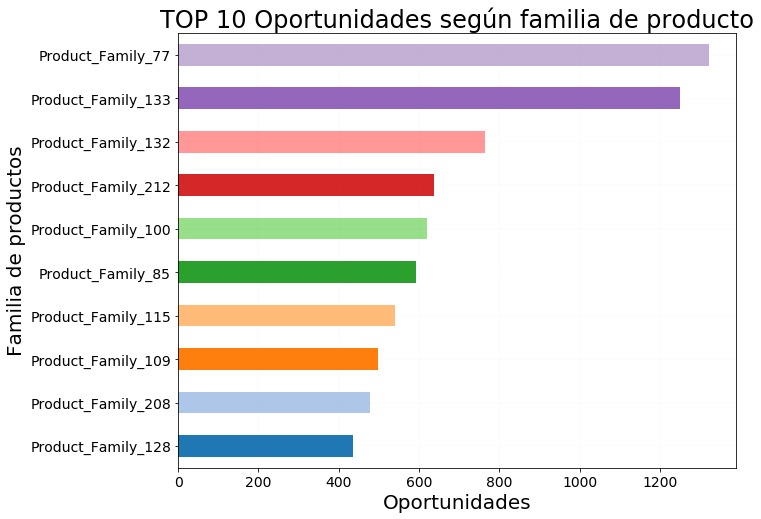

In [39]:
top10_familias_prod = df_oportunidades['Product_Family'].value_counts().nlargest(10)

p_colors = plt.cm.tab20(range(len(top10_familias_prod)))

top10_familias_prod.sort_values(ascending=True).plot(kind='barh', rot=0, figsize=(10,8), color=p_colors, fontsize=14)
plt.grid(color='grey', linestyle='-', linewidth=0.1, alpha=0.3)
plt.title('TOP 10 Oportunidades según familia de producto', fontsize=24);
plt.xlabel('Oportunidades', fontsize=20);

plt.ylabel('Familia de productos', fontsize=20);

## ¿Cuales son los productos con más oportunidades de venta?

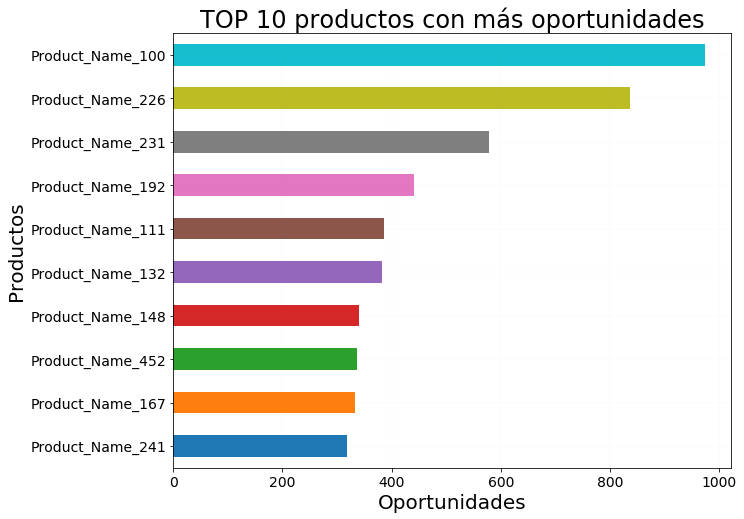

In [61]:
top10_nombre_prod = df_oportunidades['Product_Name'].value_counts().nlargest(10)

p_colors = plt.cm.tab10(range(len(top10_nombre_prod)))

top10_nombre_prod.sort_values(ascending=True).plot(kind='barh',color=p_colors, rot=0, figsize=(10,8), fontsize=14)
plt.grid(color='grey', linestyle='-', linewidth=0.1, alpha=0.3)
plt.title('TOP 10 productos con más oportunidades', fontsize=24);
plt.xlabel('Oportunidades', fontsize=20);

plt.ylabel('Productos', fontsize=20);

## ¿Influye le precio del producto en que se concrete la oportunidad?

La mayoría de los valores son None y Other. No se puede sacar conclusiones acerca del valor.

In [65]:
df_oportunidades['Price'].value_counts()

None     12765
Other      585
0.24        27
0.28        20
0.27        18
0.41        17
0.29        17
0.32        15
0.35        14
0.23        13
0.38        12
0.33        12
0.26        11
0.34        11
0.3         11
0.31        10
0.42        10
0.245        8
0.25         7
0.305        7
0.335        6
0.325        6
0.22         6
0.225        6
0.39         5
0.2          5
0.275        4
0.285        4
0.37         4
0.45         4
0.36         4
0.255        3
0.295        3
0.47         3
0.265        3
0.355        3
0.315        2
0.375        2
0.345        2
0.44         2
0.445        2
0.4          2
0.235        2
0.215        2
0.365        1
0.49         1
0.56         1
0.48         1
0.465        1
0.52         1
0.505        1
0.21         1
0.55         1
Name: Price, dtype: int64

In [130]:
grupo_anio = df_oportunidades.groupby(['Delivery_Year','Stage']).agg({'Territory':'count'}).reset_index()

estados_por_anio = grupo_anio.pivot_table(index=["Stage"],values=["Territory"],columns=["Delivery_Year"])

In [141]:
estados_anio = estados_por_anio.fillna(0).astype('int32')

estados_anio.columns = estados_anio.columns.droplevel()

#estados_anio.reset_index(inplace=True)

estados_anio

Delivery_Year,2016,2017,2018,2019,2020
Stage,,,,,
Closed Lost,1289,2159,2403,244,0
Closed Won,1595,3156,2682,97,0
Negotiation,0,0,0,14,0
Proposal,0,1,0,22,11
Qualification,0,0,0,8,3


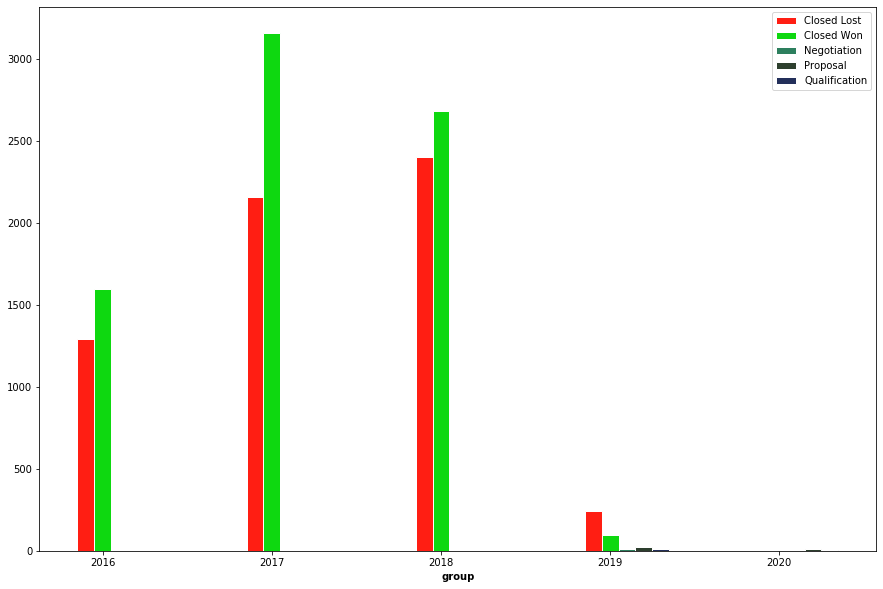

In [189]:
barWidth = 0.1
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.bar(r1, estados_anio.iloc[0], color='#FF1E13', width=barWidth, edgecolor='white', label='Closed Lost')
plt.bar(r2, estados_anio.iloc[1], color='#0ED810', width=barWidth, edgecolor='white', label='Closed Won')
plt.bar(r3, estados_anio.iloc[2], color='#2d7f5e', width=barWidth, edgecolor='white', label='Negotiation')
plt.bar(r4, estados_anio.iloc[3], color='#2d3f2e', width=barWidth, edgecolor='white', label='Proposal')
plt.bar(r5, estados_anio.iloc[4], color='#232f5a', width=barWidth, edgecolor='white', label='Qualification')
plt.rcParams["figure.figsize"] = (15,150)
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['2016', '2017', '2018', '2019', '2020'])
plt.legend()
plt.show()
